### Importing necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA


### Reading the files

In [2]:
df = pd.read_csv(r"C:\Users\sajee\OneDrive\Desktop\Xtern AI- Sajeev Singh- 2024\Data.csv")
df2 = pd.read_csv(r"C:\Users\sajee\OneDrive\Desktop\Xtern AI- Sajeev Singh- 2024\Menu.csv")

In [3]:
df.head()

,Year,Major,University,Time,Order
0,Year 2,Physics,Indiana State University,12,Fried Catfish Basket
1,Year 3,Chemistry,Ball State University,14,Sugar Cream Pie
2,Year 3,Chemistry,Butler University,12,Indiana Pork Chili
3,Year 2,Biology,Indiana State University,11,Fried Catfish Basket
4,Year 3,Business Administration,Butler University,12,Indiana Corn on the Cob (brushed with garlic b...


In [4]:
df2 = df2.drop("Unnamed: 0" ,axis = 1)
df2.head()

,Item,Price,Calories
0,Hoosier BBQ Pulled Pork Sandwich,8,400
1,Cornbread Hush Puppies,5,250
2,Breaded Pork Tenderloin Sandwich,9,550
3,Indiana Pork Chili,7,300
4,Fried Catfish Basket,10,600


### Normal Data Summary for both DataFrames

In [5]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        5000 non-null   object
 1   Major       5000 non-null   object
 2   University  5000 non-null   object
 3   Time        5000 non-null   int64 
 4   Order       5000 non-null   object
dtypes: int64(1), object(4)
memory usage: 195.4+ KB


,Time
count,5000.000000
mean,12.528200
std,1.357193
min,8.000000
25%,12.000000
50%,13.000000
75%,13.000000
max,17.000000


#### This basically shows the normal row count, mean, standard deviation, minimum , 25% quartile, 50% quartile, 75% quartile and maximum of the df.

#### Some of the important things we can notice here is- 
#### 1. Note that the Year, Major and University are object DataType.
#### 2. There are no null values in our DataFrame
#### 3. The mean time or the average time where most people order the food is 12.5 which is between 12 PM and 1 PM that shows major revenue comes from Lunch
#### 4. The minimum time food at 8 AM or the breakfast food which can be due to various reasons- opening time of food trucks, people dont prefer food trucks in breakfast, 8 AM is too early for breakfast.
#### 5. The maximum time where people order the food is 17 which means 5 PM


#### Similarily we can do this for the df2 which is our menu and cost DataFrame

In [6]:
df2.info()
df2.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Item      10 non-null     object
 1   Price     10 non-null     int64 
 2   Calories  10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


,Price,Calories
count,10.000000,10.000000
mean,6.500000,375.000000
std,2.460804,147.667043
min,3.000000,150.000000
25%,4.250000,262.500000
50%,6.500000,400.000000
75%,8.750000,450.000000
max,10.000000,600.000000


#### This shows that the mean price of items lies at 6.5 and minimum price is 3.0 and maximum price of any item is 10 and similarily for calories.

#### Now we move forward to the visual data inspection techniques to see the pattern in data

#### Lets start with our histogram analysis to see if there is any skewness in the time using matplotlib to give labels to out plot and by using histplot from sns library

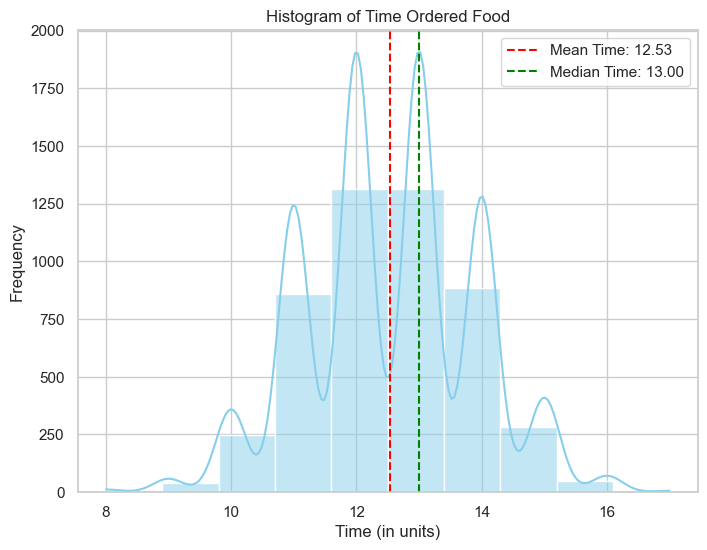

In [7]:
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid") 
ax = sns.histplot(df['Time'], bins=10, kde=True, color='skyblue')
mean_time = df['Time'].mean()
median_time = df['Time'].median()
ax.axvline(mean_time, color='red', linestyle='--', label=f'Mean Time: {mean_time:.2f}')
ax.axvline(median_time, color='green', linestyle='--', label=f'Median Time: {median_time:.2f}')

plt.title('Histogram of Time Ordered Food')
plt.xlabel('Time (in units)')
plt.ylabel('Frequency')
plt.legend()

plt.show()

#### Clearly we can see here that our time plot looks normal distribution curve and the data is not skewed in either side, also the mean and median are quite close which shows that plot is unimodal. There is no apparent outliers that can be observed with visualization


#### Now we must convert the raw data into numerical data for more good analysis 

In [8]:
### Creating copy of data
copy = df.copy()
mappings = {
    'Year': {'Year 1': 1, 'Year 2': 2, 'Year 3': 3, 'Year 4': 4},
    'Major': {value: index for index, value in enumerate(df['Major'].unique())},
    'University': {value: index for index, value in enumerate(df['University'].unique())},
    'Order': {value: index for index, value in enumerate(df['Order'].unique())}
}
for column, mapping in mappings.items():
    copy[column] = copy[column].map(mapping)

print(copy.head())

   Year  Major  University  Time  Order
0     2      0           0    12      0
1     3      1           1    14      1
2     3      1           2    12      2
3     2      2           0    11      0
4     3      3           2    12      3


#### Plotting year data to know insights

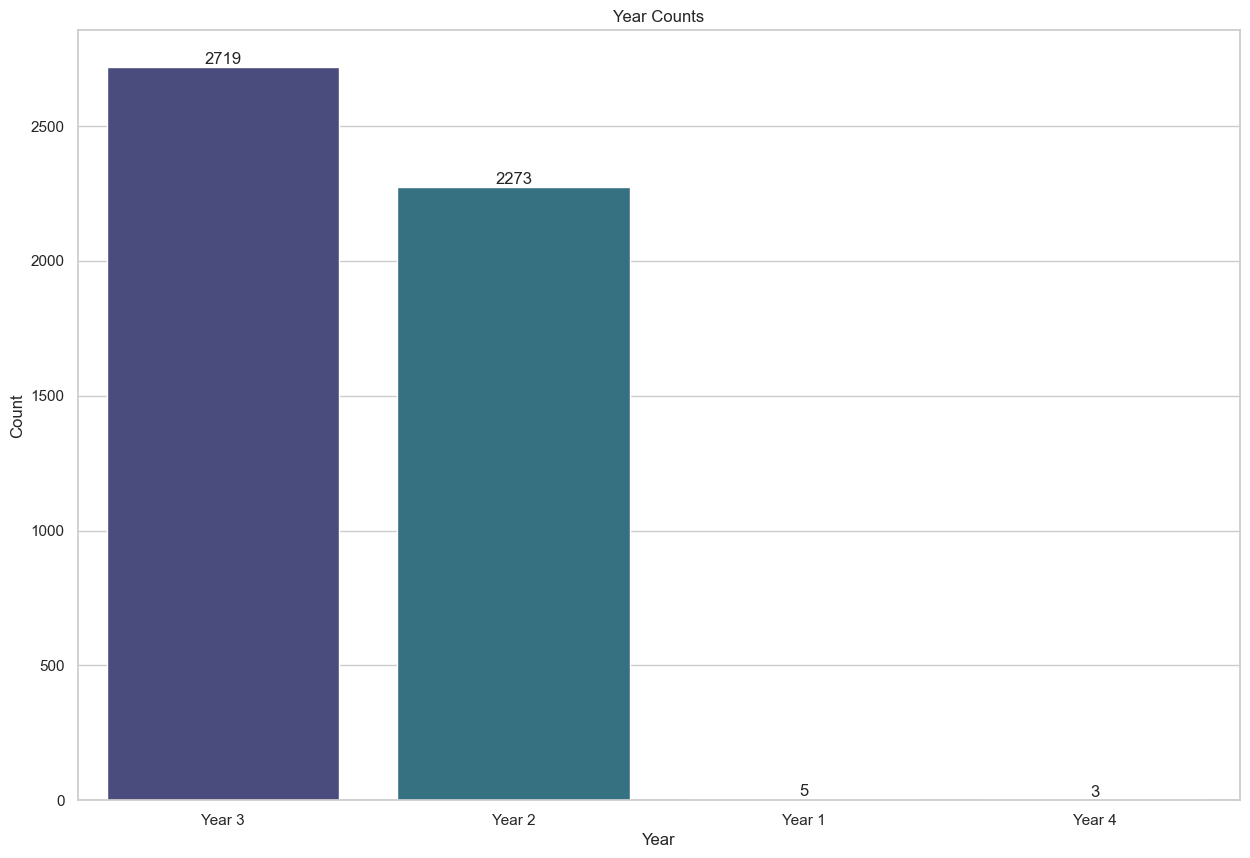

In [9]:
plt.figure(figsize=(15, 10))
sns.set(style="whitegrid")  
year_counts = df['Year'].value_counts()
ax = sns.barplot(x=year_counts.index, y=year_counts, palette="viridis")
for i, count in enumerate(year_counts):
    ax.text(i, count, f'{count}', ha='center', va='bottom')

plt.title('Year Counts')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

 #### This clearly shows that maximum number of people from year 3 uses the food truck followed by year 2 and very less year 1 and year 4 people use this

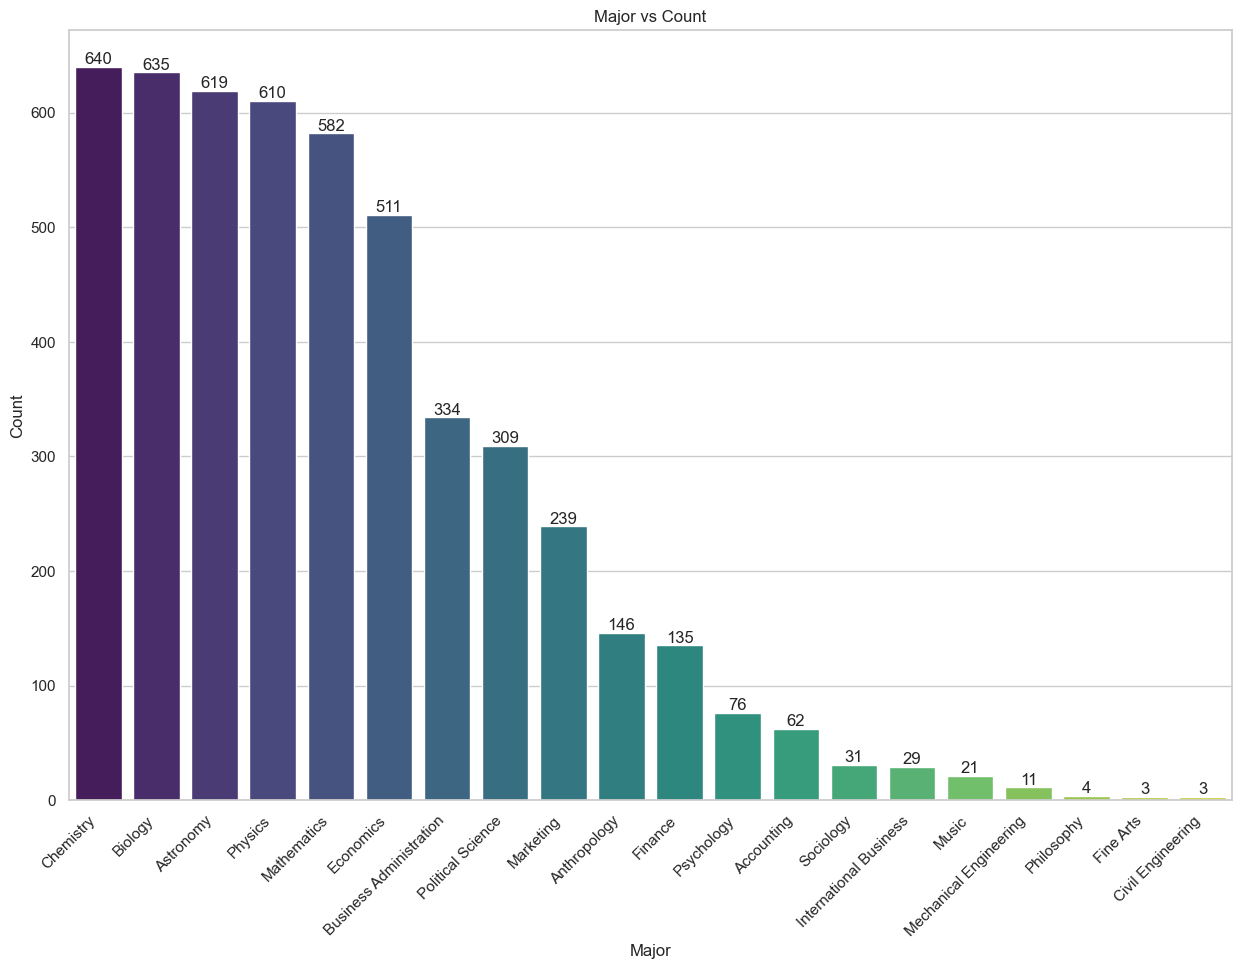

In [10]:
plt.figure(figsize=(15, 10))
sns.set(style="whitegrid")  
year_counts = df['Major'].value_counts()
ax = sns.barplot(x=year_counts.index, y=year_counts, palette="viridis")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
for i, count in enumerate(year_counts):
    ax.text(i, count, f'{count}', ha='center', va='bottom')

plt.title('Major vs Count')
plt.xlabel('Major')
plt.ylabel('Count')
plt.show()

#### This clearly shows the trend of majors over order which shows us that chemistry major people are most who orders food from food truck

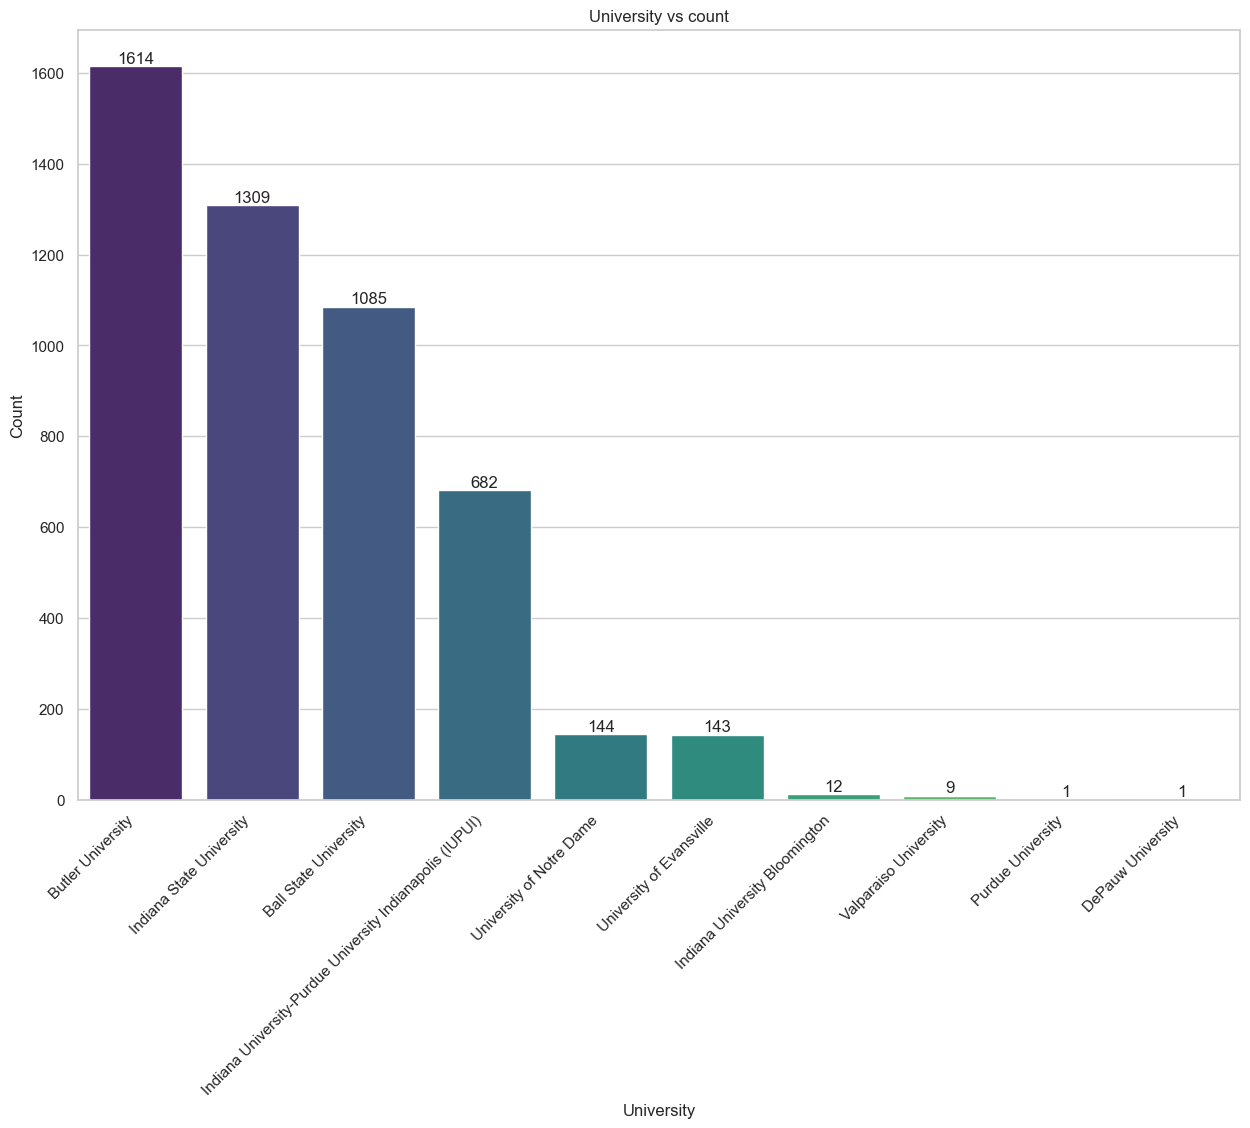

In [11]:
plt.figure(figsize=(15, 10))
sns.set(style="whitegrid")  
year_counts = df['University'].value_counts()
ax = sns.barplot(x=year_counts.index, y=year_counts, palette="viridis")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
for i, count in enumerate(year_counts):
    ax.text(i, count, f'{count}', ha='center', va='bottom')

plt.title('University vs count')
plt.xlabel('University')
plt.ylabel('Count')
plt.show()

#### This shows us the university count with respect to food truck orders which shows that Butler University people are most

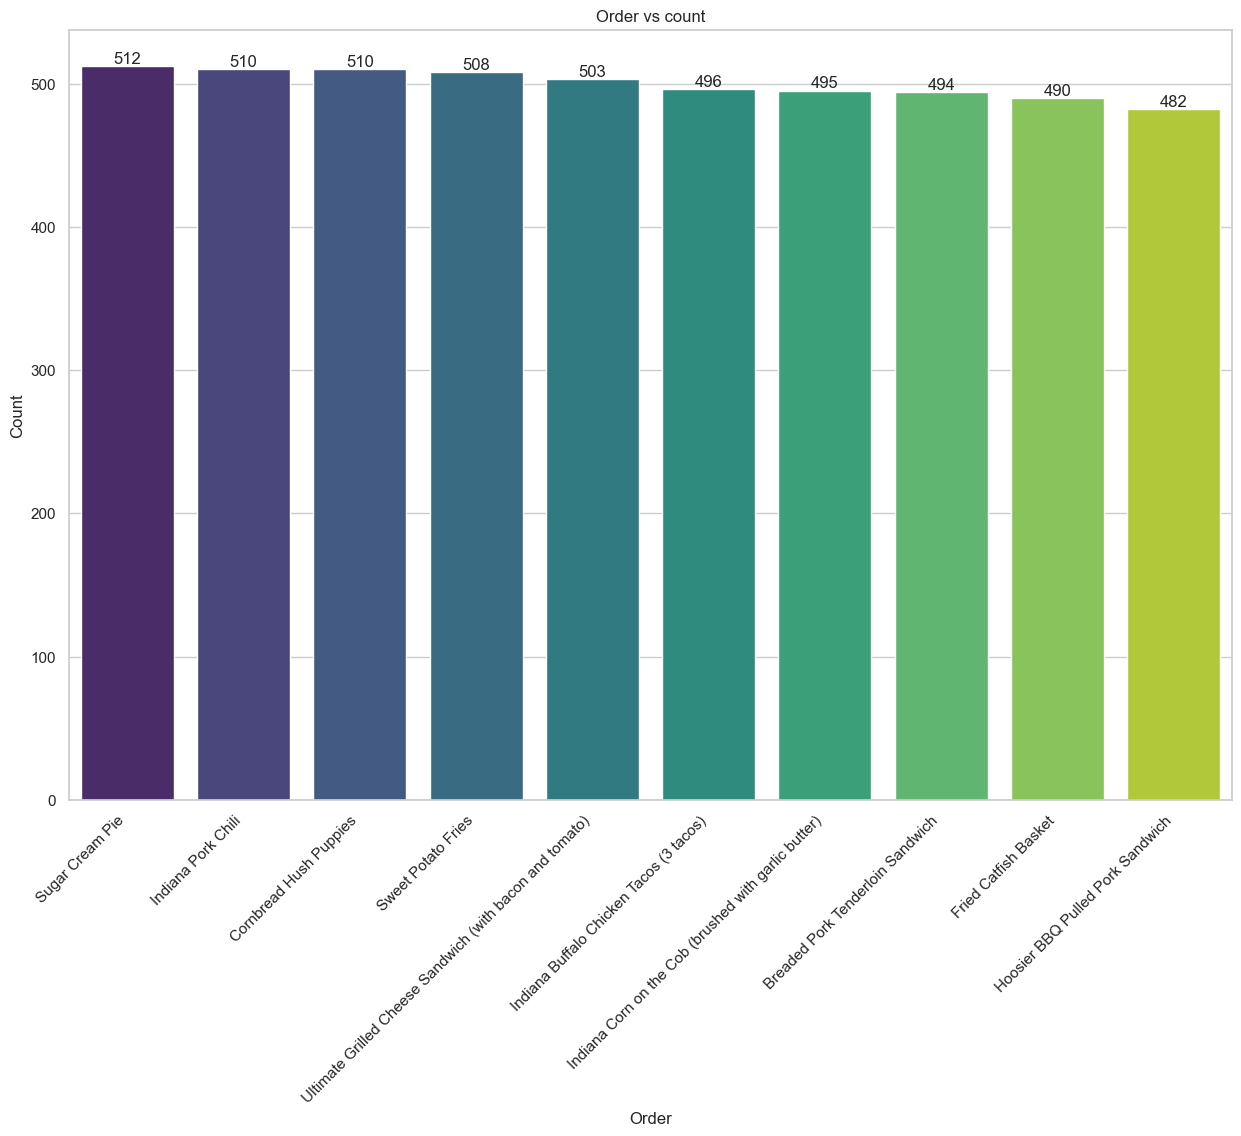

In [12]:
plt.figure(figsize=(15, 10))
sns.set(style="whitegrid")  
year_counts = df['Order'].value_counts()
ax = sns.barplot(x=year_counts.index, y=year_counts, palette="viridis")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
for i, count in enumerate(year_counts):
    ax.text(i, count, f'{count}', ha='center', va='bottom')

plt.title('Order vs count')
plt.xlabel('Order')
plt.ylabel('Count')
plt.show()

#### This shows that no particular pattern in order, people love all the food items in food truck.

#### Now let us go a little forward and try correlation matrix heatmap, pair plots to identify the pattern between different variables and any notable pattern in data

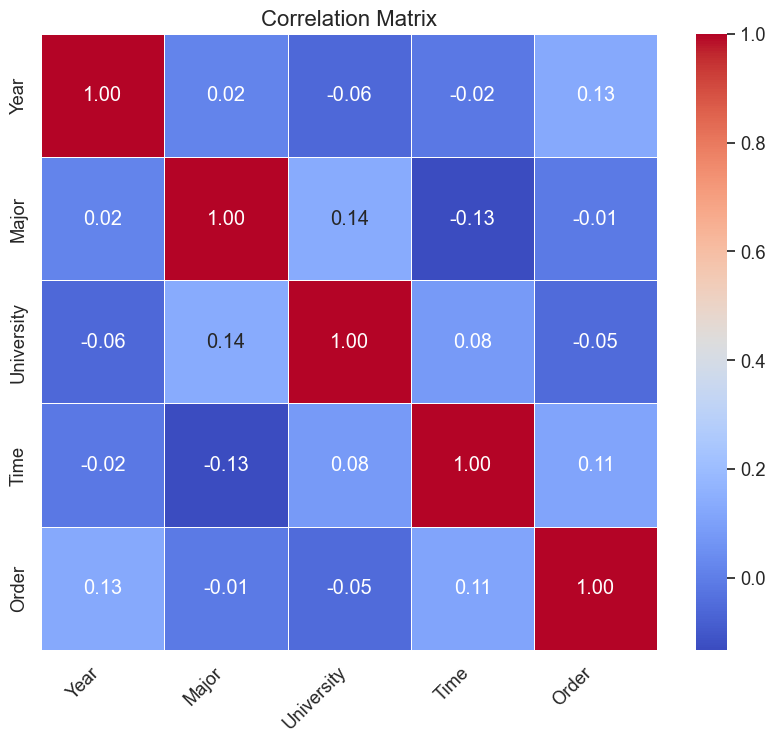

In [13]:
correlation_matrix = copy.corr()
sns.set(font_scale=1.2)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, square=True, cbar=True)
plt.title('Correlation Matrix', fontsize=16)
plt.xticks(rotation=45, horizontalalignment='right')
plt.show()


#### Clearly we can see no relation between the different variables neither positive correlation(values close to 1), neither negative correlation(values close to -1) which shows that the variables are somewhat independent

#### Now let us try performing advanced method which is- dimensionality reduction using PCA

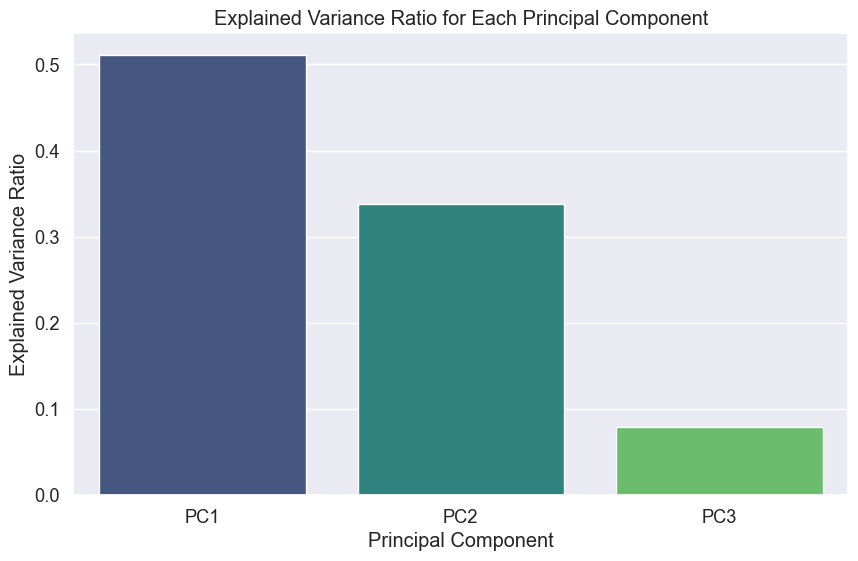

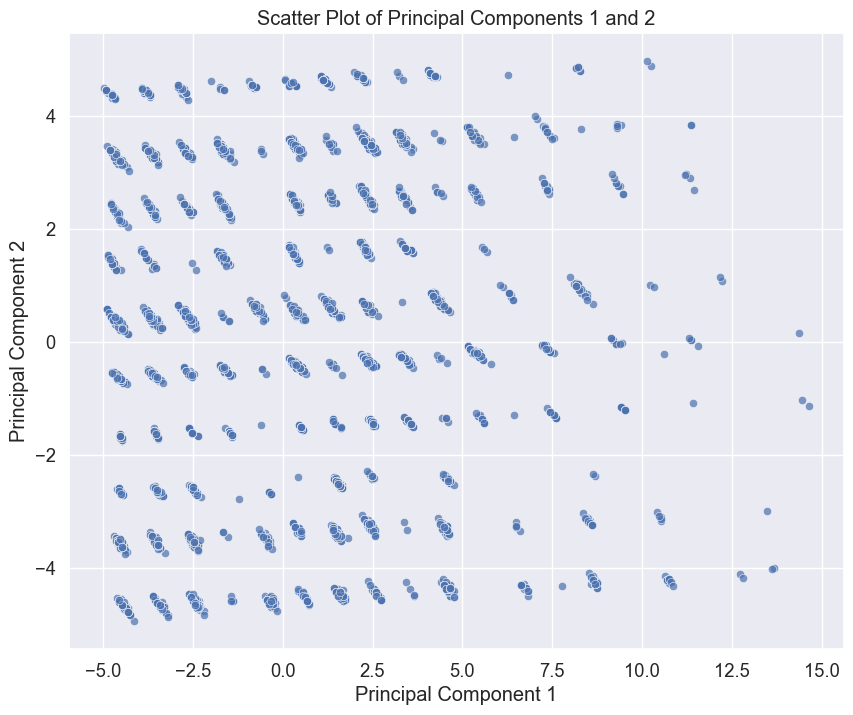

In [15]:
n_components = 3 ### This shows the number of components

# Initializing the PCA
pca = PCA(n_components=n_components)

# Fitting and transforming the data
principal_components = pca.fit_transform(copy)

### Creating a DataFrame for the principal components
principal_df = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(n_components)])

### Visualizing the explained variance ratio for each component
explained_variance_ratio = pca.explained_variance_ratio_

### Bar plot for explained variance
plt.figure(figsize=(10, 6))
sns.barplot(x=[f'PC{i+1}' for i in range(n_components)], y=explained_variance_ratio, palette='viridis')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio for Each Principal Component')
plt.show()

### Plot for first 2 principal components
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', data=principal_df, alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Scatter Plot of Principal Components 1 and 2')
plt.show()

#### Clearly ratios are very low and thus dimensionality reduction would not work in this case.

#### So far with all methods no notable pattern can be found in pattern directly which can be due to noisy data, less samples of data and complicated variables.

### Suggestions to business as per the analysis. 
### 1. Try having some more data then do analysis again for more accurate results
### 2. Considering selling it to students and have most staff in between 11 AM - 2 PM so that no order misses
### 3. Try finding reasons so as to why 1st year and 4th year people are not eating from food truck. Also try increasing sales to 2nd and 3rd year students and try increasing options they like.